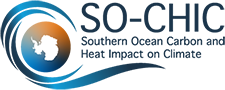


# SO-CHIC Python scripts for data discovery and harvesting

**SO-CHIC Map:** https://map.sochic-h2020.eu/

**SO-CHIC ERDDAP:** https://erddap.sochic-h2020.eu/erddap/index.html

**SO-CHIC Geoserver:** https://geoserver.sochic-h2020.eu/geoserver/web/?0

# Installing all you need


In [ ]:
! pip install erddapy
! pip install pandas
! pip install ipyleaflet
! pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.3 MB/s eta 0:00:00


# Building a Polar Map


In [ ]:
#Import the needed libraries
from ipyleaflet import Map, CircleMarker, basemaps, WMSLayer, projections, MarkerCluster
import pandas as pd

In [ ]:
#Make a map with polar projection

m3 = Map(basemap=basemaps.Esri.AntarcticBasemap, crs=projections.EPSG3031.ESRIBasemap, center=(-90, 0), zoom=2)

EP = dict(
    name='EPSG:3031',
    custom=True,
    proj4def="""+proj=stere +lat_0=-90 +lat_ts=-71 +lon_0=0 +k=1
        +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs""",
    bounds=[[-3174450,-2816050],[2867175,2406325]]
)

# Display the map
display(m3)

Map(center=[-90, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

In [ ]:
# Call and list all the ARGO from SO-CHIC

erddap_url = 'https://erddap.sochic-h2020.eu/erddap'
dataset_id = 'ARGO_FLOATS_SOCHIC'
data_format = 'csv'
dataset_type ='tabledap' #accept tabledap or griddap
start_tiem ='2021-12-11T13%3A33%3A00Z' #use the schema yyyy-mm-ddThh%3Amm%3AssZ
end_tiem ='2023-09-10T09%3A04%3A00Z' #use the schema yyyy-mm-ddThh%3Amm%3AssZ

# Construct the full URL for the query
csv_list_of_P = f"{erddap_url}/{dataset_type}/{dataset_id}.{data_format}?PLATFORMCODE&time%3E={start_tiem}&time%3C={end_tiem}&distinct()"

# Consider to use the ERDDAP data acces Form to build your URL (https://erddap.sochic-h2020.eu/)
# csv_listof_P= 'Print here your CSV url'

# Now let's use the csv data in a Data Frame Pandas and eliminate NaN values
plist = pd.read_csv(csv_list_of_P, skiprows=[1])
plist_cleaned = plist.dropna()

# Now we have the list of all ARGOS codes and we can use this to call for data!
plist_cleaned

,PLATFORMCODE
0,6902815
1,6902816
2,6902820
3,6902883
4,6902889
5,6902890
6,6902893
7,6902980
8,6903106
9,6903107


In [ ]:
#Make a random color for each argo
from random import randint

colors = []

for i in range(len(plist_cleaned)):
    colors.append('#%06X' % randint(0, 0xFFFFFF))


In [ ]:
# This code allows to mark on the map all the ARGOs Floats from SO-CHIC

for plat in range(len(plist_cleaned)):
  platform = plist_cleaned.loc[plat, 'PLATFORMCODE']
  csv_url =f'https://erddap.sochic-h2020.eu/erddap/tabledap/ARGO_FLOATS_SOCHIC.csv?PLATFORMCODE%2Ctime%2Clatitude%2Clongitude&PLATFORMCODE=%22{platform}%22&time%3E=2021-12-11T13%3A33%3A00Z&time%3C=2023-09-10T09%3A04%3A00Z'

# Remember this URL can be custumized, it is suggested to use ERDDAP data acces Form to do so

  data = pd.read_csv(csv_url, skiprows=[1])
  data_cleaned = data.dropna()
  sampling_points = data_cleaned.drop_duplicates(subset=['latitude', 'longitude'])

  for x in sampling_points.index:
    lat = sampling_points.loc[x, 'latitude']
    lon = sampling_points.loc[x, 'longitude']

    circle_marker = CircleMarker()
    circle_marker.location = (lat, lon)
    circle_marker.radius = 2

    circle_marker.color = str(colors[plat])
    circle_marker.fill_color = str(colors[plat])

# This puts the profile on the map

    m3.add_layer(circle_marker)

# Make graphs and anlysis

Now we can access the datasets, retrieve data, and explore them




<ipython-input-8-f71aeacf64ba>:36: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, label='Temperature (°C)')


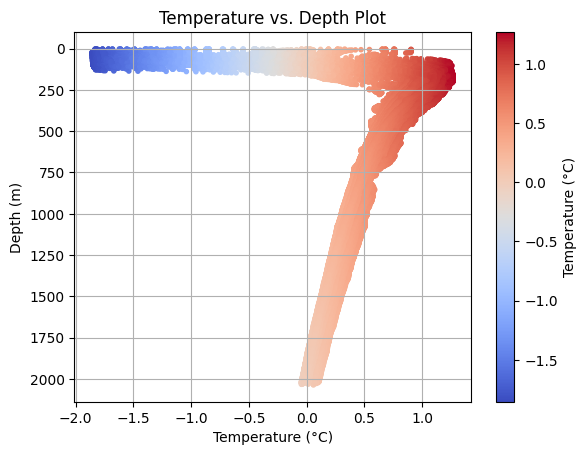

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# This code allows to make a graph of the single platform profile from ARGOs Floats from SO-CHIC

# Set here the platformcode
platform=6903107

# Set here the ERDDAP url to get the single paltform data
csv_url =f'https://erddap.sochic-h2020.eu/erddap/tabledap/ARGO_FLOATS_SOCHIC.csv?PLATFORMCODE%2Ctime%2Clatitude%2Clongitude%2CPRESS%2CTEMP%2CPSAL&PLATFORMCODE=%22{platform}%22'

# Eliminate empty values
data = pd.read_csv(csv_url, skiprows=[1])
data_cleaned = data.dropna()


# Select data from the Data Frame
temperature = data_cleaned['TEMP']
depth = data_cleaned['PRESS']

# Create a color map based on temperature
# Modify these temperature values and colors as needed
# For example, here we used blue for lower temperatures and red for higher temperatures
color_map = plt.get_cmap('coolwarm')
norm = plt.Normalize(temperature.min(), temperature.max())
colors = color_map(norm(temperature))

# Create a scatter plot with colors based on temperature
plt.scatter(temperature, depth, c=colors, marker='.', alpha=1)
#plt.plot(temperature, depth,  linestyle='-', color='b')  # You can customize the line style and color


# Add a color bar
sm = plt.cm.ScalarMappable(cmap=color_map, norm=norm)
sm.set_array([])  # This step is necessary to create a color bar
cbar = plt.colorbar(sm, label='Temperature (°C)')

# Add labels to the axes
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (m)')

# Show the plot
plt.grid()
plt.title('Temperature vs. Depth Plot')
plt.gca().invert_yaxis()  # Invert the y-axis if depth increases downwards
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


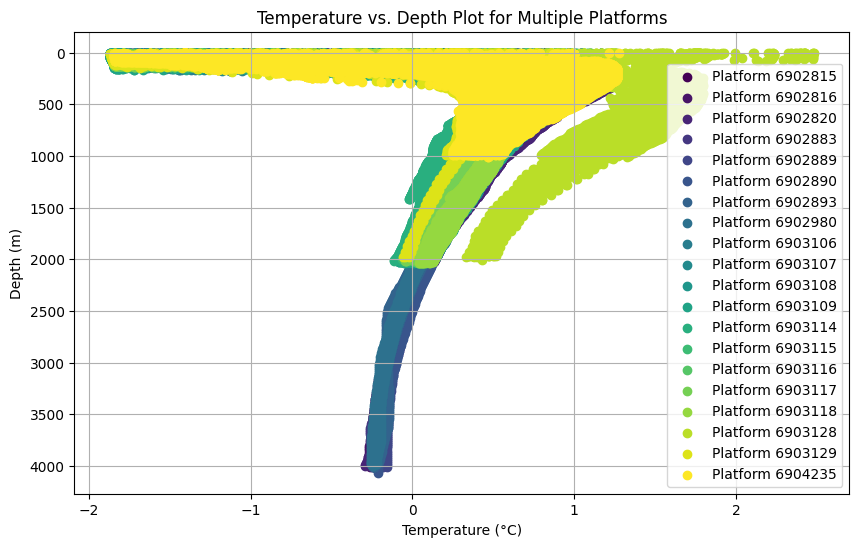

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# This code allows to make a graph of all platforms profile from ARGOs Floats from SO-CHIC

# Initialize a list of different colors for each platform
colors = plt.cm.viridis(np.linspace(0, 1, len(plist_cleaned)))

# Create the plot
plt.figure(figsize=(10, 6))  # Set the figure size as desired

for plat in range(len(plist_cleaned)):
    platform = plist_cleaned.loc[plat, 'PLATFORMCODE']
    csv_url = f'https://erddap.sochic-h2020.eu/erddap/tabledap/ARGO_FLOATS_SOCHIC.csv?PLATFORMCODE%2Ctime%2Clatitude%2Clongitude%2CPRESS%2CTEMP%2CPSAL&PLATFORMCODE=%22{platform}%22'

    data = pd.read_csv(csv_url, skiprows=[1])
    data_cleaned = data.dropna()

    # Select data from the DataFrame
    temperature = data_cleaned['TEMP']
    depth = data_cleaned['PRESS']  # Use the PRESS column directly if depth is increasing downwards

    # Create a scatter plot with colors based on temperature and depth
    plt.scatter(temperature, depth, c=[colors[plat]], label=f'Platform {platform}', alpha=1)

# Add a legend
plt.legend()

# Add labels to the axes
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (m)')

# Show the plot
plt.grid()
plt.title('Temperature vs. Depth Plot for Multiple Platforms')
plt.gca().invert_yaxis()  # Invert the y-axis if depth increases downwards
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# List of platforms CTDs from SO-CHIC
plist = [72, 74, 78, 80, 82]

# Initialize a list of different colors for each platform
colors = plt.cm.viridis(np.linspace(0, 1, len(plist)))

# Create the plot
plt.figure(figsize=(10, 6))  # Set the figure size as desired

for platform in plist:
    csv_url = f'https://erddap.sochic-h2020.eu/erddap/tabledap/CTD_SOCHIC_Cruise_2022.csv?PLATFORMCODE%2CDEPTH%2CTEMP&PLATFORMCODE={platform}'

    data = pd.read_csv(csv_url, skiprows=[1])
    data_cleaned = data.dropna()

    # Select data from the DataFrame
    temperature = data_cleaned['TEMP']
    depth = data_cleaned['DEPTH']

    # Create a scatter plot with colors based on temperature and depth
    plt.scatter(temperature, depth, c=[colors[plist.index(platform)]], label=f'Platform {platform}', alpha=1)

# Add a legend
plt.legend()

# Add labels to the axes
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (m)')

# Show the plot
plt.grid()
plt.title('Temperature vs. Depth Plot for Multiple Platforms')
plt.gca().invert_yaxis()  # Invert the y-axis if depth increases downwards
plt.show()


HTTPError: HTTP Error 400: 

<Figure size 1000x600 with 0 Axes>

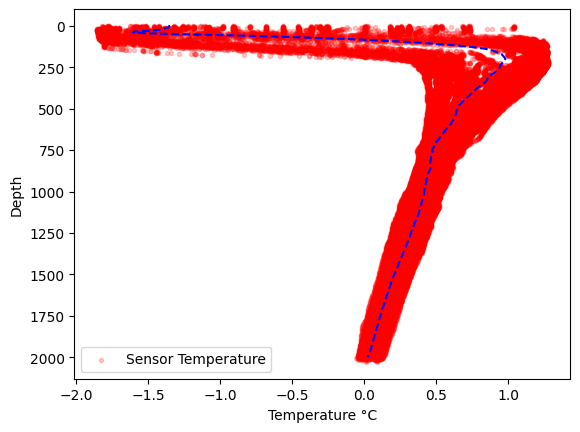

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import time

# This code allows to make a graph of the ARGO Floats n 6903106 from SO-CHIC vs CORA Temperature climatology


# Set the time range year and month
year = '2021'
month = '12'
platform = 6903106  # Replace with the desired PLATFORMCODE

# Construct URL for platform data
csv_url = f'https://erddap.sochic-h2020.eu/erddap/tabledap/ARGO_FLOATS_SOCHIC.csv?PLATFORMCODE%2Ctime%2Clatitude%2Clongitude%2CPRESS%2CTEMP%2CPSAL&PLATFORMCODE=%22{platform}%22'

# Read the position data (the first row of the platform data)
position = pd.read_csv(csv_url, skiprows=[1], nrows=1)
lat = position.loc[0, 'latitude']
lon = position.loc[0, 'longitude']

# Construct URL for temperature data
cora_url = f'https://erddap.sochic-h2020.eu/erddap/griddap/INSITU_GLO_PHY_TS_OA_MY_013_052.csv?TEMP%5B({year}-{month}-15):1:({year}-{month}-15T00:00:00Z)%5D%5B(1.0):1:(2000)%5D%5B({lat}):1:({lat})%5D%5B({lon}):1:({lon})%5D'

# Read temperature data from Cora
cora_temp_data = pd.read_csv(cora_url, skiprows=[1])

# Extract temperature and depth values from the Cora data
cora_temperatures = cora_temp_data['TEMP']
cora_depths = cora_temp_data['depth']

# Extract sensor temperature and depth data for the platform
data = pd.read_csv(csv_url, skiprows=[1])
data_cleaned = data.dropna()
sensor_temperatures = data_cleaned['TEMP']
sensor_depths = data_cleaned['PRESS']  # Assuming PRESS represents depth

# Create a scatter plot with temperature on the x-axis and depth on the y-axis

plt.scatter(sensor_temperatures, sensor_depths, label='Sensor Temperature', marker='.', color='red',alpha=0.2)

plt.plot(cora_temperatures, cora_depths,  linestyle='dashed', color='b')  # You can customize the line style and color
# Add labels and legend
plt.xlabel('Temperature °C')
plt.ylabel('Depth')
plt.gca().invert_yaxis()  # Invert the y-axis if depth increases downwards
plt.legend()

# Display the plot
plt.show()

# Even easier with erddapy

Here is an example of how to harvest data using erddapy. The idea remains the same: once you have the DataFrame with the data you are interested in, you can perform some analysis and go beyond.

In [ ]:
! pip install erddapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.5 MB/s eta 0:00:00


In [ ]:
from erddapy import ERDDAP


# This code allows to get the data from a specific dataset using erddapy into a dataframe

# Connect to a specific ERDDAP
e = ERDDAP(
  server="https://data-erddap.emodnet-physics.eu/erddap",
  protocol="tabledap",
)

# Set the Dataset information and variables you wish to harvest
e.response = "csv"
e.dataset_id = "ERD_EP_PR_TEMP_NRT"
e.constraints = {
    "time>=": "2023-04-01T00:09:45Z",
    "time<=": "2023-04-30T00:10:45Z",
    # set all the constrins you need
    #"latitude>=": ,
    #"latitude<=": ,
    #"longitude>=": ,
    #"longitude<=": ,
    "PLATFORMCODE=": "1800910",
}
e.variables = [
    "PLATFORMCODE",
    "depth",
    "latitude",
    "longitude",
    "TEMP",
]

df = e.to_pandas()

#Show your dataframe

df


,PLATFORMCODE,depth (m),latitude (degrees_north),longitude (degrees_east),TEMP (degree_Celsius)
0,1800910,2.140000,-10.68194,13.23000,2.937700e+01
1,1800910,7.720000,-10.68194,13.23000,2.718200e+01
2,1800910,16.629999,-10.68194,13.23000,2.465300e+01
3,1800910,26.120001,-10.68194,13.23000,2.346500e+01
4,1800910,33.630001,-10.68194,13.23000,2.285300e+01
...,...,...,...,...,...
863,1800910,NaN,-10.64641,13.21737,-2.147484e+09
864,1800910,NaN,-10.64641,13.21737,-2.147484e+09
865,1800910,NaN,-10.64641,13.21737,-2.147484e+09
866,1800910,NaN,-10.64641,13.21737,-2.147484e+09


from matplotlib import pyplot as plt
df['depth (m)'].plot(kind='hist', bins=20, title='depth (m)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['latitude (degrees_north)'].plot(kind='hist', bins=20, title='latitude (degrees_north)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['longitude (degrees_east)'].plot(kind='hist', bins=20, title='longitude (degrees_east)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['TEMP (degree_Celsius)'].plot(kind='hist', bins=20, title='TEMP (degree_Celsius)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='depth (m)', y='latitude (degrees_north)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='latitude (degrees_north)', y='longitude (degrees_east)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='longitude (degrees_east)', y='TEMP (degree_Celsius)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PLATFORMCODE']
  ys = series['depth (m)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('PLATFORMCODE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PLATFORMCODE')
_ = plt.ylabel('depth (m)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PLATFORMCODE']
  ys = series['latitude (degrees_north)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('PLATFORMCODE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PLATFORMCODE')
_ = plt.ylabel('latitude (degrees_north)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PLATFORMCODE']
  ys = series['longitude (degrees_east)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('PLATFORMCODE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PLATFORMCODE')
_ = plt.ylabel('longitude (degrees_east)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['PLATFORMCODE']
  ys = series['TEMP (degree_Celsius)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('PLATFORMCODE', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('PLATFORMCODE')
_ = plt.ylabel('TEMP (degree_Celsius)')

from matplotlib import pyplot as plt
df['depth (m)'].plot(kind='line', figsize=(8, 4), title='depth (m)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['latitude (degrees_north)'].plot(kind='line', figsize=(8, 4), title='latitude (degrees_north)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['longitude (degrees_east)'].plot(kind='line', figsize=(8, 4), title='longitude (degrees_east)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['TEMP (degree_Celsius)'].plot(kind='line', figsize=(8, 4), title='TEMP (degree_Celsius)')
plt.gca().spines[['top', 'right']].set_visible(False)

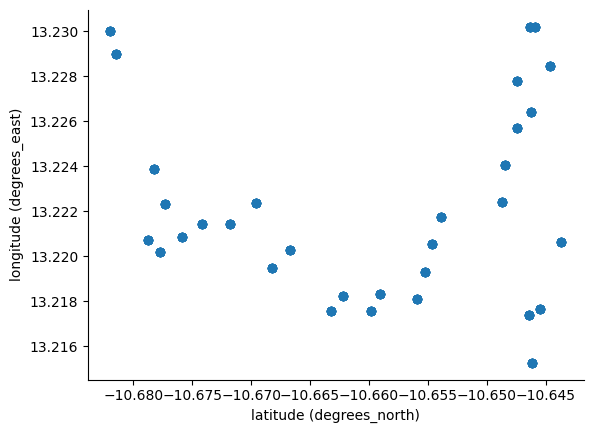

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='latitude (degrees_north)', y='longitude (degrees_east)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

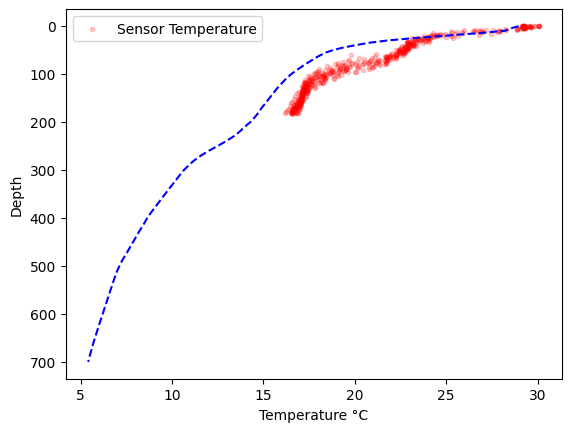

In [ ]:
import pandas as pd

# Read the position data (the first row of the platform data)
position = df
lat = position.loc[0, 'latitude (degrees_north)']
lon = position.loc[0, 'longitude (degrees_east)']

# Set the time range year and month
year = '2021'
month = '04'

# Construct URL for temperature data
cora_url = f'https://prod-erddap.emodnet-physics.eu/erddap/griddap/INSITU_GLO_PHY_TS_OA_MY_013_052.csv?TEMP%5B({year}-{month}-15):1:({year}-{month}-15T00:00:00Z)%5D%5B(1.0):1:(2000)%5D%5B({lat}):1:({lat})%5D%5B({lon}):1:({lon})%5D'

# Read temperature data from Cora
cora_temp_data = pd.read_csv(cora_url, skiprows=[1])

# Extract temperature and depth values from the Cora data
cora_temperatures = cora_temp_data['TEMP']
cora_depths = cora_temp_data['depth']

# Extract sensor temperature and depth data for the platform
data = df
data_cleaned = data.dropna()
sensor_temperatures = data_cleaned['TEMP (degree_Celsius)']
sensor_depths = data_cleaned['depth (m)']  # Assuming PRESS represents depth

# Create a scatter plot with temperature on the x-axis and depth on the y-axis

plt.scatter(sensor_temperatures, sensor_depths, label='Sensor Temperature', marker='.', color='red',alpha=0.2)

plt.plot(cora_temperatures, cora_depths,  linestyle='dashed', color='b')  # You can customize the line style and color
# Add labels and legend
plt.xlabel('Temperature °C')
plt.ylabel('Depth')
plt.gca().invert_yaxis()  # Invert the y-axis if depth increases downwards
plt.legend()

# Display the plot
plt.show()

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', y='depth (m)', x='TEMP (degree_Celsius)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name 'df' is not defined